<img style="float: center;" src="fig/uni72.png" width="200px">
<h2> <center>Especialização em Engenharia de Software - Turma 13 <br><br>- Módulo de Análise de Dados -</center></h2>

Prof: Fernando Siqueira <br>
Equipe: Ivan Pereira Alves | Fernando Guarany

# Etapa de Modelagem de Dados

### 1.0 EXPLORAÇÃO DE DADOS

#### CARREGANDO BIBLIOTECAS

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### CARREGANDO DADOS

In [83]:
df = pd.read_csv("combustiveis-brasil.csv")

In [84]:
# remove registros duplicados
df.drop_duplicates(inplace=True)

# Exploratory Analysis 

In [85]:
df.head()

,referencia,ano,mes,gasolina_comum_preco_revenda_avg,gasolina_comum_preco_revenda_min,gasolina_comum_preco_revenda_max,gasolina_aditivada_preco_revenda_avg,gasolina_aditivada_preco_revenda_min,gasolina_aditivada_preco_revenda_max,etanol_hidratado_preco_revenda_avg,...,oleo_diesel_preco_revenda_max,oleo_diesel_s10_preco_revenda_avg,oleo_diesel_s10_preco_revenda_min,oleo_diesel_s10_preco_revenda_max,gas_cozinha_glp_preco_revenda_avg,gas_cozinha_glp_preco_revenda_min,gas_cozinha_glp_preco_revenda_max,gas_natural_veicular_gnv_preco_revenda_avg,gas_natural_veicular_gnv_preco_revenda_min,gas_natural_veicular_gnv_preco_revenda_max
0,2001-07,2001,7,1.6814,1.379,2.00,NaN,NaN,NaN,1.0093,...,1.00,NaN,NaN,NaN,17.1949,12.0,24.5,0.7300,0.509,0.799
1,2001-08,2001,8,1.7110,1.440,2.38,NaN,NaN,NaN,1.0143,...,1.28,NaN,NaN,NaN,17.7025,12.5,27.0,0.7409,0.699,0.799
2,2001-09,2001,9,1.7180,1.430,2.38,NaN,NaN,NaN,1.0265,...,1.28,NaN,NaN,NaN,17.8996,12.5,29.0,0.7405,0.699,0.799
3,2001-10,2001,10,1.7787,1.410,2.48,NaN,NaN,NaN,1.0391,...,1.39,NaN,NaN,NaN,18.7322,12.0,30.5,0.7653,0.699,0.899
4,2001-11,2001,11,1.7802,1.440,2.45,NaN,NaN,NaN,1.0326,...,1.32,NaN,NaN,NaN,18.8690,12.0,31.0,0.7795,0.699,0.899


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   referencia                                  258 non-null    object 
 1   ano                                         258 non-null    int64  
 2   mes                                         258 non-null    int64  
 3   gasolina_comum_preco_revenda_avg            258 non-null    float64
 4   gasolina_comum_preco_revenda_min            258 non-null    float64
 5   gasolina_comum_preco_revenda_max            258 non-null    float64
 6   gasolina_aditivada_preco_revenda_avg        28 non-null     float64
 7   gasolina_aditivada_preco_revenda_min        28 non-null     float64
 8   gasolina_aditivada_preco_revenda_max        28 non-null     float64
 9   etanol_hidratado_preco_revenda_avg          258 non-null    float64
 10  etanol_hidrata

In [87]:
df.describe()

,ano,mes,gasolina_comum_preco_revenda_avg,gasolina_comum_preco_revenda_min,gasolina_comum_preco_revenda_max,gasolina_aditivada_preco_revenda_avg,gasolina_aditivada_preco_revenda_min,gasolina_aditivada_preco_revenda_max,etanol_hidratado_preco_revenda_avg,etanol_hidratado_preco_revenda_min,...,oleo_diesel_preco_revenda_max,oleo_diesel_s10_preco_revenda_avg,oleo_diesel_s10_preco_revenda_min,oleo_diesel_s10_preco_revenda_max,gas_cozinha_glp_preco_revenda_avg,gas_cozinha_glp_preco_revenda_min,gas_cozinha_glp_preco_revenda_max,gas_natural_veicular_gnv_preco_revenda_avg,gas_natural_veicular_gnv_preco_revenda_min,gas_natural_veicular_gnv_preco_revenda_max
count,258.000000,258.000000,258.000000,258.000000,258.000000,28.000000,28.000000,28.000000,258.000000,258.000000,...,258.000000,121.000000,121.000000,121.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,2011.755814,6.538760,3.204879,2.590213,4.288016,5.893643,4.645929,7.965929,2.159020,1.549651,...,3.512655,3.662488,2.988826,4.879851,47.932762,33.500465,73.361822,2.013855,1.476430,2.826461
std,6.240204,3.472018,1.195967,0.955909,1.496462,0.905977,0.866328,1.051640,0.952039,0.791040,...,1.626778,1.228106,0.916489,1.569563,22.348433,16.126184,33.832158,1.014255,0.683801,1.454837
min,2001.000000,1.000000,1.508800,1.170000,2.000000,4.509000,3.457000,5.999000,0.912200,0.499000,...,1.000000,2.226000,1.938000,2.399000,17.194900,11.000000,24.500000,0.730000,0.490000,0.799000
25%,2006.000000,4.000000,2.493000,2.040750,3.300000,5.150000,4.014750,6.999000,1.453250,0.979000,...,2.580000,2.957000,2.469000,3.750000,32.743250,24.000000,48.000000,1.269000,0.949000,1.870000
50%,2012.000000,7.000000,2.742000,2.252000,3.699000,5.794500,4.599000,7.994500,1.943000,1.390000,...,2.915000,3.327000,2.730000,4.528000,39.002500,26.000000,62.000000,1.720500,1.309000,2.550000
75%,2017.000000,10.000000,3.777750,3.099000,5.074750,6.737000,5.323500,8.907500,2.744000,1.990000,...,4.345000,3.777000,3.099000,5.090000,57.582250,39.990000,105.000000,2.361500,1.780000,3.215000
max,2023.000000,12.000000,7.280000,6.180000,8.990000,7.390000,6.379000,9.280000,5.370000,4.170000,...,9.000000,7.570000,6.290000,9.650000,113.513000,84.990000,160.000000,5.300000,3.190000,7.990000


# Previsões do preço da gasolina 

## Preparação de pré-processamento

* Converter o campo `referencia` em índice de linha do dataframe

In [88]:
df['referencia']

0      2001-07
1      2001-08
2      2001-09
3      2001-10
4      2001-11
        ...   
253    2022-09
254    2022-10
255    2022-11
256    2022-12
257    2023-01
Name: referencia, Length: 258, dtype: object

In [89]:
df.index = pd.to_datetime(df['referencia'], format='%Y-%m')

In [90]:
df.index

DatetimeIndex(['2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01',
               '2002-03-01', '2002-04-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='referencia', length=258, freq=None)

* Referência de período ao índice

## Previsão de preço médio

* Verificando se `gasolina_comum_preco_revenda_avg` possui valores nulos

In [91]:
df.gasolina_comum_preco_revenda_avg.isnull().sum()

0

* Criando um novo dataframe para analisar o segmento usando apenas valores de índice e métricas

In [92]:
df_gasolina_avg = df.gasolina_comum_preco_revenda_avg

In [93]:
df_gasolina_avg.tail()

referencia
2022-09-01    5.00
2022-10-01    4.89
2022-11-01    5.04
2022-12-01    4.97
2023-01-01    5.05
Name: gasolina_comum_preco_revenda_avg, dtype: float64

### Criando dataframes de treinamento e teste

In [94]:
train = df_gasolina_avg[df_gasolina_avg.index <= pd.to_datetime("2022-09-01", format='%Y-%m-%d')]
train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)

In [95]:
train.index = train.index.to_period('M')

In [96]:
train.shape

(254,)

In [97]:
test = df_gasolina_avg[df_gasolina_avg.index >= pd.to_datetime("2022-09-01", format='%Y-%m-%d')]
test.index = pd.DatetimeIndex(test.index.values,freq=test.index.inferred_freq)

In [98]:
test.index = test.index.to_period('M')

In [99]:
test.shape

(5,)

### Criação de visualização da base treinamento e teste

In [100]:
x_train = pd.to_datetime(train.index.to_timestamp())
y_train = train.values

In [101]:
x_test = pd.to_datetime(test.index.to_timestamp())
y_test = test.values

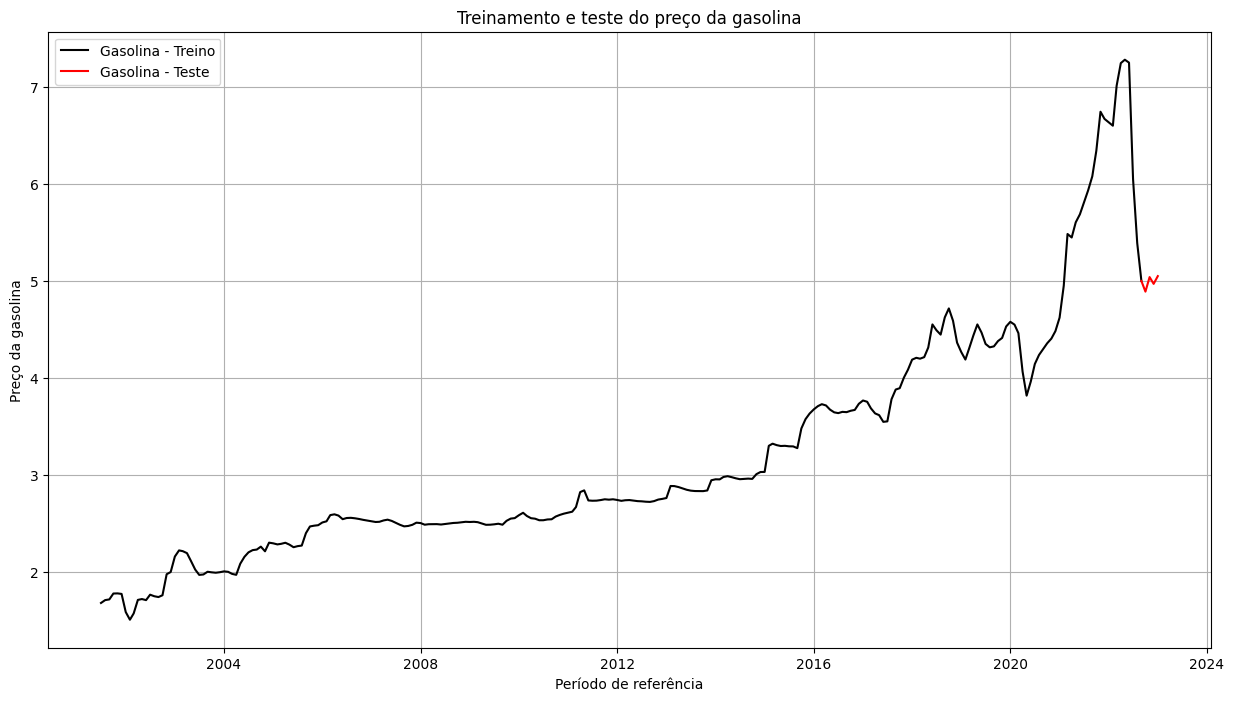

In [102]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(x_train, y_train, label="Gasolina - Treino", color='black')
plt.plot(x_test, y_test, label="Gasolina - Teste", color='red')
plt.xlabel("Período de referência")
plt.ylabel("Preço da gasolina")


plt.title("Treinamento e teste do preço da gasolina")
plt.legend()
plt.show()

### Encontrando o melhor ajuste para o modelo ARIMA
* Os preços da gasolina não são estacionários, neste caso precisamos definir `seasonal=False` para encontrar o modelo mais adequado
* Eu usei `autoarima` para encontrar o melhor ajuste


### Testando modelos SARIMAX

In [103]:
SARIMAXmodel = SARIMAX(train, order=(2,1,3), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit()

In [104]:
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predicaos"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index

y_pred_out_sarima = y_pred_df["Predicaos"] 

In [105]:
y_pred_out_sarima

2022-09    4.985866
2022-10    5.157419
2022-11    5.218304
2022-12    5.112334
2023-01    4.992003
Freq: M, Name: Predicaos, dtype: float64

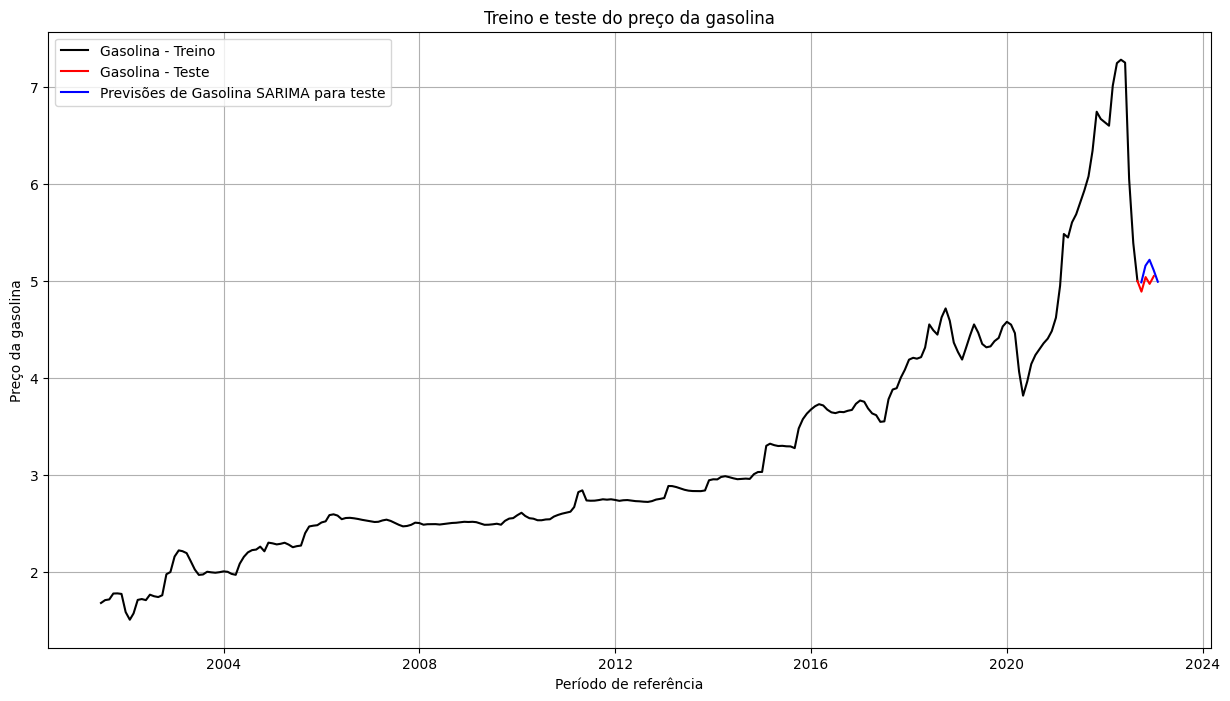

In [106]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(x_train, y_train, label="Gasolina - Treino", color='black')
plt.plot(x_test, y_test, label="Gasolina - Teste", color='red')
plt.plot(y_pred_out_sarima, color='Blue', label = 'Previsões de Gasolina SARIMA para teste')

plt.xlabel("Período de referência")
plt.ylabel("Preço da gasolina")

plt.title("Treino e teste do preço da gasolina")
plt.legend()
plt.show()

### Criando previsões para os proximos 12 meses

In [107]:
start_predict = pd.DatetimeIndex(["2022-09-01"], freq="MS")[0]
start_predict

Timestamp('2022-09-01 00:00:00')

In [108]:
end_predict = pd.DatetimeIndex(["2023-12-01"], freq="MS")[0]
end_predict

Timestamp('2023-12-01 00:00:00')

In [109]:
prediction_sarimax = SARIMAXmodel.predict(start=start_predict, end=end_predict)

### Valores de previsão 

In [110]:
prediction_sarimax

2022-08    5.191864
2022-09    4.985866
2022-10    5.157419
2022-11    5.218304
2022-12    5.112334
2023-01    4.992003
2023-02    5.003826
2023-03    5.113512
2023-04    5.174608
2023-05    5.121227
2023-06    5.034816
2023-07    5.024046
2023-08    5.090324
2023-09    5.142430
2023-10    5.120023
2023-11    5.061317
2023-12    5.042250
Freq: M, Name: predicted_mean, dtype: float64

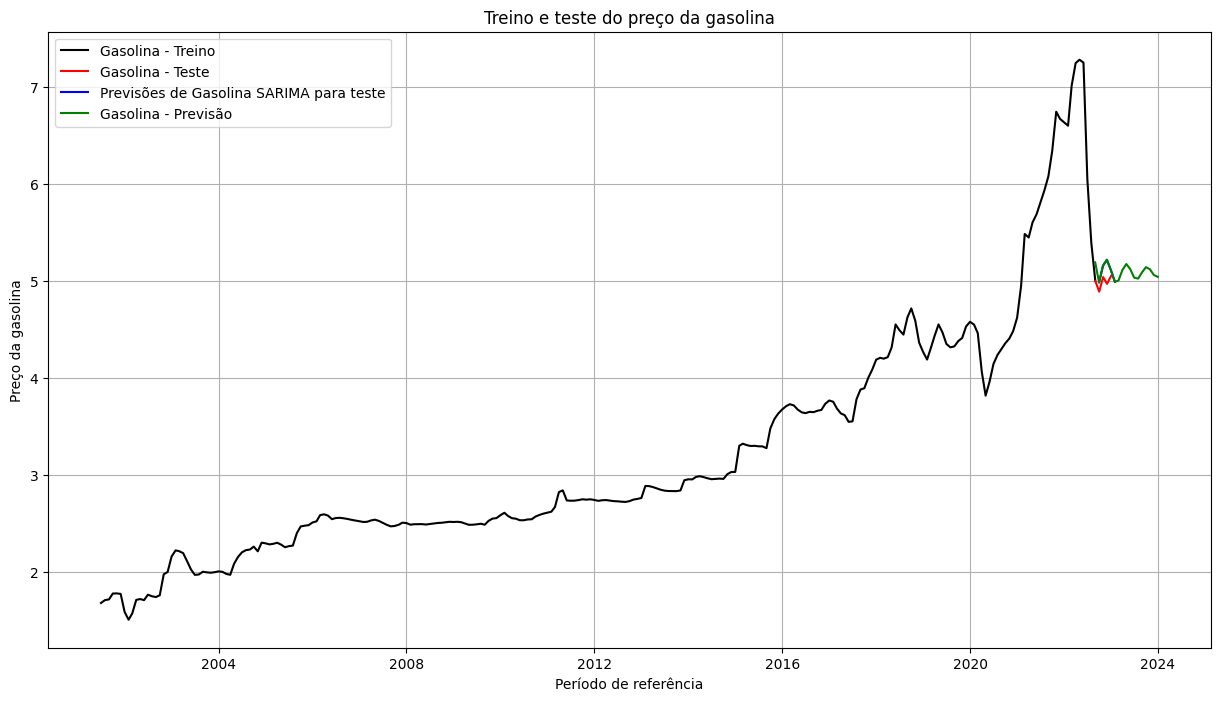

In [111]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(x_train, y_train, label="Gasolina - Treino", color='black')
plt.plot(x_test, y_test, label="Gasolina - Teste", color='red')
plt.plot(y_pred_out_sarima, color='Blue', label = 'Previsões de Gasolina SARIMA para teste')

plt.plot(prediction_sarimax, label="Gasolina - Previsão", color='green')

plt.xlabel("Período de referência")
plt.ylabel("Preço da gasolina")

plt.title("Treino e teste do preço da gasolina")
plt.legend()
plt.show()